In [1]:

import sys
sys.path.append('../lsnc')
from hierarchical_lsnc import HierarchicalLSNC
import numpy as np
from tqdm import tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import itertools


## import the list of datasets
datasets = []
for directory in os.listdir("./labeled-datasets/npy/"):
	if (
		directory != ".DS_Store"
		and directory != "README.md"
		and directory != ".gitignore"
		and not directory.endswith(".zip")
	):
		datasets.append(directory)

## load the data
raw_list     = []
label_list   = []
tsne_list    = []
umap_list    = []
pca_list	   = []
iso_list	   = []
lle_list     = []
densmap_list = []

for dataset in tqdm(datasets):
	raw = np.nan_to_num(np.load(f"./labeled-datasets/npy/{dataset}/data.npy"))
	raw = (raw - raw.mean(axis=0)) / raw.std(axis=0)
	raw = raw[:, ~np.isnan(raw).any(axis=0)]
	raw_list.append(raw)
	label_list.append(np.load("./labeled-datasets/npy/{}/label.npy".format(dataset)))
	tsne_list.append(np.load("./labeled-datasets_embedding/{}/tsne.npy".format(dataset)))
	umap_list.append(np.load("./labeled-datasets_embedding/{}/umap.npy".format(dataset)))
	pca_list.append(np.load("./labeled-datasets_embedding/{}/pca.npy".format(dataset)))
	iso_list.append(np.load("./labeled-datasets_embedding/{}/isomap.npy".format(dataset)))
	lle_list.append(np.load("./labeled-datasets_embedding/{}/lle.npy".format(dataset)))
	densmap_list.append(np.load("./labeled-datasets_embedding/{}/densmap.npy".format(dataset)))



  0%|          | 0/94 [00:00<?, ?it/s]<ipython-input-1-4456c3ae1870>:37: RuntimeWarning: invalid value encountered in true_divide
  raw = (raw - raw.mean(axis=0)) / raw.std(axis=0)
100%|██████████| 94/94 [00:01<00:00, 62.08it/s]


In [3]:
def runEmbeddings(emb_list):
    frames = []
    for idx, (raw, emb, label) in enumerate(zip(raw_list, emb_list, label_list)):
        print(f'Dataset: {idx}')
        #if idx != 0: continue
         
        hlsnc = HierarchicalLSNC(raw, emb, cvm="dsc")
        result = hlsnc.run(granularity=5)
        frames.append({
                "dataset": idx,
                "ls": result["ls"],
                "lc": result["lc"],
                "unique_raw_label": np.unique(label).tolist()
         })
        # except: 
        # print(f"Error in: {idx}")
    return frames

In [4]:
dr_types = ['tsne', 'umap', 'pca', 'iso', 'lle', 'densmap']
embs = [tsne_list, umap_list, pca_list, iso_list, lle_list, densmap_list]

frames = []
for dr_type, emb in zip(dr_types, embs):
    results = runEmbeddings(emb)
    frames.append({
        'result': results,
        'dr_type': dr_type,
    })

Dataset: 0
Dataset: 1
Dataset: 2
Dataset: 3
Dataset: 4
Dataset: 5
Dataset: 6
Dataset: 7
Dataset: 8
Dataset: 9
Dataset: 10
Dataset: 11
Dataset: 12
Dataset: 13
Dataset: 14
Dataset: 15
Dataset: 16
Dataset: 17
Dataset: 18
Dataset: 19
Dataset: 20
Dataset: 21
Dataset: 22
Dataset: 23
Dataset: 24
Dataset: 25
Dataset: 26
Dataset: 27
Dataset: 28
Dataset: 29
Dataset: 30
Dataset: 31
Dataset: 32
Dataset: 33
Dataset: 34
Dataset: 35
Dataset: 36
Dataset: 37
Dataset: 38
Dataset: 39
Dataset: 40
Dataset: 41
Dataset: 42
Dataset: 43
Dataset: 44
Dataset: 45
Dataset: 46


../lsnc/lsnc.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ls = 1 - np.sum(ls_mat) / (self.label_num * (self.label_num - 1) / 2)
../lsnc/lsnc.py:90: RuntimeWarning: invalid value encountered in double_scalars
  lc = 1 - np.sum(lc_mat) / (self.label_num * (self.label_num - 1) / 2)


Dataset: 47
Dataset: 48
Dataset: 49
Dataset: 50
Dataset: 51
Dataset: 52
Dataset: 53
Dataset: 54
Dataset: 55
Dataset: 56
Dataset: 57
Dataset: 58
Dataset: 59
Dataset: 60
Dataset: 61
Dataset: 62
Dataset: 63
Dataset: 64
Dataset: 65
Dataset: 66
Dataset: 67
Dataset: 68
Dataset: 69
Dataset: 70
Dataset: 71
Dataset: 72
Dataset: 73
Dataset: 74
Dataset: 75
Dataset: 76
Dataset: 77
Dataset: 78
Dataset: 79
Dataset: 80
Dataset: 81
Dataset: 82
Dataset: 83
Dataset: 84
Dataset: 85
Dataset: 86
Dataset: 87
Dataset: 88
Dataset: 89
Dataset: 90
Dataset: 91
Dataset: 92
Dataset: 93
Dataset: 0
Dataset: 1
Dataset: 2
Dataset: 3
Dataset: 4
Dataset: 5
Dataset: 6
Dataset: 7
Dataset: 8
Dataset: 9
Dataset: 10
Dataset: 11
Dataset: 12
Dataset: 13
Dataset: 14
Dataset: 15
Dataset: 16
Dataset: 17
Dataset: 18
Dataset: 19
Dataset: 20
Dataset: 21
Dataset: 22
Dataset: 23
Dataset: 24
Dataset: 25
Dataset: 26
Dataset: 27
Dataset: 28
Dataset: 29
Dataset: 30
Dataset: 31
Dataset: 32
Dataset: 33
Dataset: 34
Dataset: 35
Dataset: 36
Da

In [13]:
import json
with open('./shc_data/data_granularity_5_dsc.json', 'w') as f:
    json.dump(frames, f)


In [3]:
import json
with open("./shc_data/data_granularity_20_dsc.json", "r") as f:
		frames = json.load(f)

In [4]:
'''
Compare t-SNE / UMAP / PCA / Isomap / LLE / Densmap from using hierarchical LSNC (already imported)
aggregate the results as a single line for each technique 
(use lineplot in seaborn)

the final result should be a lineplot with 6 lines and confidence intervals (for each technique)
'''
def _reformat(nestedData: pd.DataFrame, column_name: str):
    decouples = nestedData[column_name].apply(pd.Series)
    decouples = pd.melt(decouples, value_vars=decouples.columns, var_name='level', value_name='score')
    decouples = decouples.loc[~decouples['score'].isna(), :]
    decouples['metric'] = column_name
    return decouples

stats = []
for each in frames:
    data = pd.DataFrame(each.get('result', None))
    data_ls = _reformat(data, 'ls')
    data_lc = _reformat(data, 'lc')
    data = pd.concat([data_ls, data_lc], ignore_index=True)
    data['type'] = each.get('dr_type', '')
    stats.append(data)

stats = pd.concat(stats, ignore_index=True)

<Figure size 432x288 with 0 Axes>

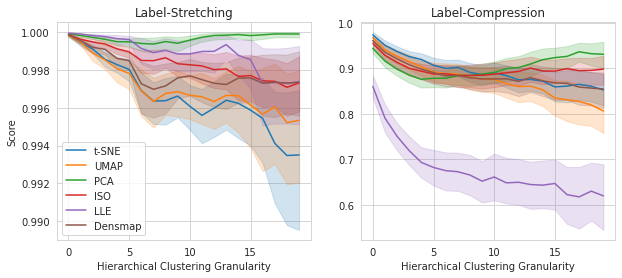

In [5]:
plt.clf()
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
dr_types = ['tsne', 'umap', 'pca', 'iso', 'lle', 'densmap']
dr_names = ['t-SNE', 'UMAP', 'PCA', 'ISO', "LLE", 'Densmap']
metrics = ['ls', 'lc']
colors = [sns.color_palette('tab10')[i] for i in range(6)]

for i, metric in enumerate(metrics):
	mask = (stats['metric'] == metric)
	sns.lineplot(x = "level", y = "score", hue = "type", data = stats.loc[mask, :], ax = axes[i%2], ci=95)

	## set x axis log
	#axes[i%2].set_xscale("log")

	## set label with measures_name
	axes[i%2].set_xlabel("Hierarchical Clustering Granularity")
	axes[i%2].set_ylabel("Score" if i == 0 else "")
	axes[i%2].set_title("Label-Stretching" if i == 0 else "Label-Compression")
	## set legend
	if i== 0:
		axes[i].legend(labels=dr_names, title=None)
	else:
		axes[i].legend([],[], frameon=False)


In [7]:
hj_df = stats

Text(0.5, 1.0, 'Label-Trustworthiness (Label-Compression)')

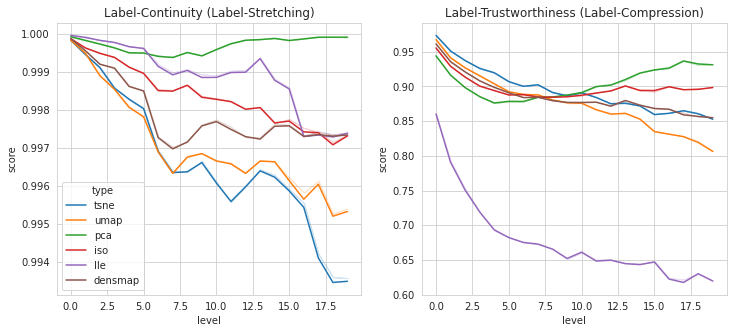

In [12]:
lc_df = hj_df.loc[hj_df['metric'] == 'lc']


ls_df = hj_df.loc[hj_df['metric'] == 'ls']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x = "level", y = "score", hue = "type", data = ls_df, ax = ax[0], ci=0)
ax[0].set_title("Label-Continuity (Label-Stretching)")
sns.lineplot(x = "level", y = "score", hue = "type", data = lc_df, ax = ax[1], ci=0, legend=False)
ax[1].set_title("Label-Trustworthiness (Label-Compression)")